In [11]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [12]:
hello = tf.constant('Hello world!')

In [13]:
sess = tf.Session()
result = sess.run(hello)
print(result)

sess.close()

b'Hello world!'


In [14]:
with tf.Session() as sess:
    result = sess.run(hello)
    print(result)

b'Hello world!'


In [16]:
a=tf.constant(2)
b=tf.constant(3)
c=tf.constant([1,2,3,4])
d=tf.constant([2,3,4,5])


In [23]:
with tf.Session() as sess:
    print ('a={},b={},c={},d={}\n'.format(sess.run(a), sess.run(b), sess.run(c), sess.run(d)))
    print('a+b={}\n'
      'a*b={}'.format(sess.run(a+b),sess.run(a*b)))
    print('c+d={}\n'
      'c*d={}'.format(sess.run(c+d),sess.run(c*d)))

a=2,b=3,c=[1 2 3 4],d=[2 3 4 5]

a+b=5
a*b=6
c+d=[3 5 7 9]
c*d=[ 2  6 12 20]


In [25]:
a= tf.placeholder(tf.int16)
b= tf.placeholder(tf.int16)
add=tf.add(a,b)
mul = tf.multiply(a,b)

In [27]:
with tf.Session() as sess:
    writer= tf.summary.FileWriter('logs', sess.graph)
    print('a+b={}'.format(sess.run(add,feed_dict={a:3,b:1})))
    print('a*b={}'.format(sess.run(mul,feed_dict={a:7,b:8})))

a+b=4
a*b=56


In [30]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [31]:
from sklearn.datasets import make_regression

n_samples =42
x_train, y_train = make_regression( n_samples= n_samples, n_features=1, noise=15,random_state=7)
x_train = (x_train-x_train.mean())/x_train.std()
y_train = (y_train - y_train.mean())/y_train.std()

print(x_train[:5])

[[ 0.03264883]
 [ 2.00453732]
 [-0.09529635]
 [-0.29220736]
 [ 0.19354651]]


In [32]:
X=tf.placeholder('float')
Y=tf.placeholder('float')
W=tf.Variable(np.random.randn(),name='weight')
b=tf.Variable(np.random.randn(),name='bias')

In [35]:
prediction= tf.add(tf.multiply(X,W),b)
learning_rate = tf.placeholder(tf.float32, shape=[])
cost = tf.reduce_sum(tf.pow(prediction-Y,2))/n_samples
optimizer= tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
init=tf.global_variables_initializer()


In [37]:
epochs = 1000
sess=tf.Session()
sess.run(init)

lr=0.1
for epoch in range(epochs):
    for(x_batch, y_batch) in zip(x_train, y_train):
        sess.run(optimizer, feed_dict={X:x_batch, Y: y_batch,learning_rate:lr})
    if epochs%100==0:
        lr/=2
        c= sess.run(cost, feed_dict={X:x_train, Y: y_train})
        print('Epoch #{}:cost={}'.format(epoch,c))
        
        

Epoch #0:cost=100.03681182861328
Epoch #1:cost=94.63803100585938
Epoch #2:cost=92.2965316772461
Epoch #3:cost=91.2052001953125
Epoch #4:cost=90.67826843261719
Epoch #5:cost=90.41934967041016
Epoch #6:cost=90.291015625
Epoch #7:cost=90.22714233398438
Epoch #8:cost=90.19523620605469
Epoch #9:cost=90.17931365966797
Epoch #10:cost=90.1714096069336
Epoch #11:cost=90.16740417480469
Epoch #12:cost=90.16542053222656
Epoch #13:cost=90.16443634033203
Epoch #14:cost=90.16393280029297
Epoch #15:cost=90.16368865966797
Epoch #16:cost=90.16354370117188
Epoch #17:cost=90.16350555419922
Epoch #18:cost=90.16348266601562
Epoch #19:cost=90.16348266601562
Epoch #20:cost=90.16348266601562
Epoch #21:cost=90.16348266601562
Epoch #22:cost=90.16348266601562
Epoch #23:cost=90.16348266601562
Epoch #24:cost=90.16348266601562
Epoch #25:cost=90.16348266601562
Epoch #26:cost=90.16348266601562
Epoch #27:cost=90.16348266601562
Epoch #28:cost=90.16348266601562
Epoch #29:cost=90.16348266601562
Epoch #30:cost=90.163482666

Epoch #246:cost=90.16348266601562
Epoch #247:cost=90.16348266601562
Epoch #248:cost=90.16348266601562
Epoch #249:cost=90.16348266601562
Epoch #250:cost=90.16348266601562
Epoch #251:cost=90.16348266601562
Epoch #252:cost=90.16348266601562
Epoch #253:cost=90.16348266601562
Epoch #254:cost=90.16348266601562
Epoch #255:cost=90.16348266601562
Epoch #256:cost=90.16348266601562
Epoch #257:cost=90.16348266601562
Epoch #258:cost=90.16348266601562
Epoch #259:cost=90.16348266601562
Epoch #260:cost=90.16348266601562
Epoch #261:cost=90.16348266601562
Epoch #262:cost=90.16348266601562
Epoch #263:cost=90.16348266601562
Epoch #264:cost=90.16348266601562
Epoch #265:cost=90.16348266601562
Epoch #266:cost=90.16348266601562
Epoch #267:cost=90.16348266601562
Epoch #268:cost=90.16348266601562
Epoch #269:cost=90.16348266601562
Epoch #270:cost=90.16348266601562
Epoch #271:cost=90.16348266601562
Epoch #272:cost=90.16348266601562
Epoch #273:cost=90.16348266601562
Epoch #274:cost=90.16348266601562
Epoch #275:cos

Epoch #489:cost=90.16348266601562
Epoch #490:cost=90.16348266601562
Epoch #491:cost=90.16348266601562
Epoch #492:cost=90.16348266601562
Epoch #493:cost=90.16348266601562
Epoch #494:cost=90.16348266601562
Epoch #495:cost=90.16348266601562
Epoch #496:cost=90.16348266601562
Epoch #497:cost=90.16348266601562
Epoch #498:cost=90.16348266601562
Epoch #499:cost=90.16348266601562
Epoch #500:cost=90.16348266601562
Epoch #501:cost=90.16348266601562
Epoch #502:cost=90.16348266601562
Epoch #503:cost=90.16348266601562
Epoch #504:cost=90.16348266601562
Epoch #505:cost=90.16348266601562
Epoch #506:cost=90.16348266601562
Epoch #507:cost=90.16348266601562
Epoch #508:cost=90.16348266601562
Epoch #509:cost=90.16348266601562
Epoch #510:cost=90.16348266601562
Epoch #511:cost=90.16348266601562
Epoch #512:cost=90.16348266601562
Epoch #513:cost=90.16348266601562
Epoch #514:cost=90.16348266601562
Epoch #515:cost=90.16348266601562
Epoch #516:cost=90.16348266601562
Epoch #517:cost=90.16348266601562
Epoch #518:cos

Epoch #730:cost=90.16348266601562
Epoch #731:cost=90.16348266601562
Epoch #732:cost=90.16348266601562
Epoch #733:cost=90.16348266601562
Epoch #734:cost=90.16348266601562
Epoch #735:cost=90.16348266601562
Epoch #736:cost=90.16348266601562
Epoch #737:cost=90.16348266601562
Epoch #738:cost=90.16348266601562
Epoch #739:cost=90.16348266601562
Epoch #740:cost=90.16348266601562
Epoch #741:cost=90.16348266601562
Epoch #742:cost=90.16348266601562
Epoch #743:cost=90.16348266601562
Epoch #744:cost=90.16348266601562
Epoch #745:cost=90.16348266601562
Epoch #746:cost=90.16348266601562
Epoch #747:cost=90.16348266601562
Epoch #748:cost=90.16348266601562
Epoch #749:cost=90.16348266601562
Epoch #750:cost=90.16348266601562
Epoch #751:cost=90.16348266601562
Epoch #752:cost=90.16348266601562
Epoch #753:cost=90.16348266601562
Epoch #754:cost=90.16348266601562
Epoch #755:cost=90.16348266601562
Epoch #756:cost=90.16348266601562
Epoch #757:cost=90.16348266601562
Epoch #758:cost=90.16348266601562
Epoch #759:cos

Epoch #983:cost=90.16348266601562
Epoch #984:cost=90.16348266601562
Epoch #985:cost=90.16348266601562
Epoch #986:cost=90.16348266601562
Epoch #987:cost=90.16348266601562
Epoch #988:cost=90.16348266601562
Epoch #989:cost=90.16348266601562
Epoch #990:cost=90.16348266601562
Epoch #991:cost=90.16348266601562
Epoch #992:cost=90.16348266601562
Epoch #993:cost=90.16348266601562
Epoch #994:cost=90.16348266601562
Epoch #995:cost=90.16348266601562
Epoch #996:cost=90.16348266601562
Epoch #997:cost=90.16348266601562
Epoch #998:cost=90.16348266601562
Epoch #999:cost=90.16348266601562


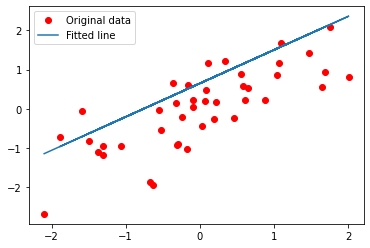

In [39]:
plt.plot(x_train,y_train,'ro',label='Original data')
plt.plot(x_train,sess.run(W)*x_train+sess.run(b), label='Fitted line')
plt.legend()
plt.show()